In [2]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.neighbors import KernelDensity
#from sklearn.impute import KNNImputer
import pandas as pd
import seaborn as sns
import numpy as np

In [21]:
# Load the data
data = pd.read_csv (r'C:\Users\tomeral\Desktop\LF_CLUSTERING_MODEL_POP_08042021.csv')
df= data[['AGE','TEL_MOBILE_IND','DAYS_TO_LAST_SITE_ENTRY','LF1_POLICYHOLDER_STATUS_ID','LF21_POLICYHOLDER_STATUS_ID','WAGE_EARNERS_15_OLDER_PCT','AVG_MONTHLY_INCOME_PERSON_AMT']]
# descriptive stats of our features
df.describe()

,AGE,TEL_MOBILE_IND,DAYS_TO_LAST_SITE_ENTRY,LF1_POLICYHOLDER_STATUS_ID,LF21_POLICYHOLDER_STATUS_ID,WAGE_EARNERS_15_OLDER_PCT,AVG_MONTHLY_INCOME_PERSON_AMT
count,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,27574.000000,27574.000000
mean,40.324967,0.188700,50976.73670,-1.244867,-1.130467,13.351019,4908.693769
std,18.753139,1.324142,38887.60078,1.206768,1.318422,11.815197,3281.897554
min,0.000000,-2.000000,2.00000,-2.000000,-2.000000,0.000000,0.000000
25%,29.000000,-2.000000,317.00000,-2.000000,-2.000000,3.460610,2861.000000
50%,42.000000,1.000000,80816.00000,-2.000000,-2.000000,10.567600,4938.000000
75%,53.000000,1.000000,80816.00000,0.000000,1.000000,21.249525,6931.000000
max,221.000000,1.000000,80816.00000,1.000000,1.000000,68.000000,23097.000000


In [22]:
df.head()

,AGE,TEL_MOBILE_IND,DAYS_TO_LAST_SITE_ENTRY,LF1_POLICYHOLDER_STATUS_ID,LF21_POLICYHOLDER_STATUS_ID,WAGE_EARNERS_15_OLDER_PCT,AVG_MONTHLY_INCOME_PERSON_AMT
0,43,1,80816,-2,-2,NaN,NaN
1,43,-2,80816,-2,-2,15.3739,5904.0
2,73,-2,80816,0,-2,38.4150,13797.0
3,78,1,80816,-2,-2,0.0000,0.0
4,93,-2,80816,-2,-2,0.0000,0.0


In [36]:
# null values of the data
df.isna().sum()
# selected_features.fillna(0, inplace=True)

AGE                                 0
TEL_MOBILE_IND                      0
DAYS_TO_LAST_SITE_ENTRY             0
LF1_POLICYHOLDER_STATUS_ID          0
LF21_POLICYHOLDER_STATUS_ID         0
WAGE_EARNERS_15_OLDER_PCT        2426
AVG_MONTHLY_INCOME_PERSON_AMT    2426
dtype: int64

In [46]:
#from sklearn.impute import simpleimputer
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values=np.nan, strategy='median')
idf=pd.DataFrame(imp.fit_transform(df))
idf.columns=df.columns
idf.index=df.index
df=idf
df.isna().sum()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


AGE                              0
TEL_MOBILE_IND                   0
DAYS_TO_LAST_SITE_ENTRY          0
LF1_POLICYHOLDER_STATUS_ID       0
LF21_POLICYHOLDER_STATUS_ID      0
WAGE_EARNERS_15_OLDER_PCT        0
AVG_MONTHLY_INCOME_PERSON_AMT    0
dtype: int64

In [49]:
df.describe()

,AGE,TEL_MOBILE_IND,DAYS_TO_LAST_SITE_ENTRY,LF1_POLICYHOLDER_STATUS_ID,LF21_POLICYHOLDER_STATUS_ID,WAGE_EARNERS_15_OLDER_PCT,AVG_MONTHLY_INCOME_PERSON_AMT
count,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,40.324967,0.188700,50976.73670,-1.244867,-1.130467,13.125934,4911.063667
std,18.753139,1.324142,38887.60078,1.206768,1.318422,11.352774,3146.408030
min,0.000000,-2.000000,2.00000,-2.000000,-2.000000,0.000000,0.000000
25%,29.000000,-2.000000,317.00000,-2.000000,-2.000000,3.888680,3123.000000
50%,42.000000,1.000000,80816.00000,-2.000000,-2.000000,10.567600,4938.000000
75%,53.000000,1.000000,80816.00000,0.000000,1.000000,20.061600,6707.000000
max,221.000000,1.000000,80816.00000,1.000000,1.000000,68.000000,23097.000000


In [50]:
# datatype of the features
df.dtypes
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# df['PN8746_INDUSTRY_NUM'] = label_encoder.fit_transform(df['PN8746_INDUSTRY_NAME'])

AGE                              float64
TEL_MOBILE_IND                   float64
DAYS_TO_LAST_SITE_ENTRY          float64
LF1_POLICYHOLDER_STATUS_ID       float64
LF21_POLICYHOLDER_STATUS_ID      float64
WAGE_EARNERS_15_OLDER_PCT        float64
AVG_MONTHLY_INCOME_PERSON_AMT    float64
dtype: object

In [51]:
corr = df.corr(method='pearson')
corr.style.background_gradient(cmap='coolwarm', axis=None)

,AGE,TEL_MOBILE_IND,DAYS_TO_LAST_SITE_ENTRY,LF1_POLICYHOLDER_STATUS_ID,LF21_POLICYHOLDER_STATUS_ID,WAGE_EARNERS_15_OLDER_PCT,AVG_MONTHLY_INCOME_PERSON_AMT
AGE,1,0.357389,-0.258205,0.283283,-0.302793,0.0624116,0.0725838
TEL_MOBILE_IND,0.357389,1,-0.439055,0.201792,-0.0620075,0.00744592,0.00942299
DAYS_TO_LAST_SITE_ENTRY,-0.258205,-0.439055,1,-0.216726,0.0303554,-0.0233137,-0.0227131
LF1_POLICYHOLDER_STATUS_ID,0.283283,0.201792,-0.216726,1,0.00552264,0.0280711,0.0276259
LF21_POLICYHOLDER_STATUS_ID,-0.302793,-0.0620075,0.0303554,0.00552264,1,-0.0118321,-0.0161039
WAGE_EARNERS_15_OLDER_PCT,0.0624116,0.00744592,-0.0233137,0.0280711,-0.0118321,1,0.926508
AVG_MONTHLY_INCOME_PERSON_AMT,0.0725838,0.00942299,-0.0227131,0.0276259,-0.0161039,0.926508,1


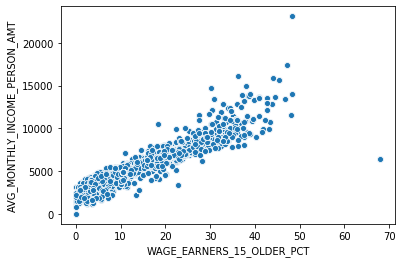

In [52]:
sns.scatterplot(x=df.WAGE_EARNERS_15_OLDER_PCT, y=df.AVG_MONTHLY_INCOME_PERSON_AMT)

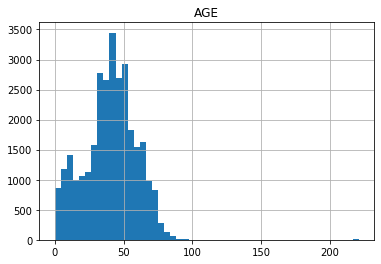

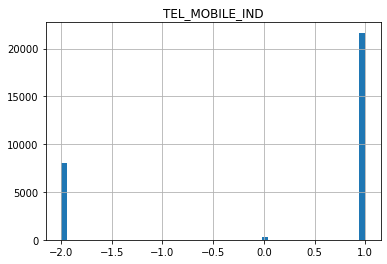

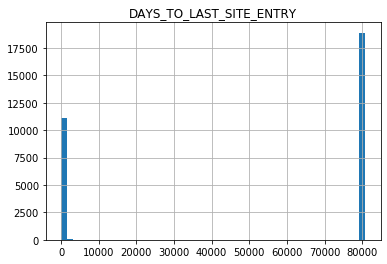

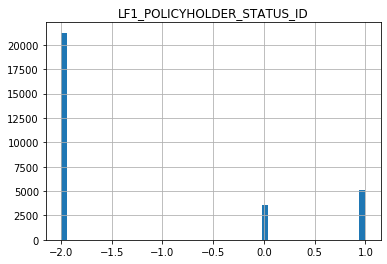

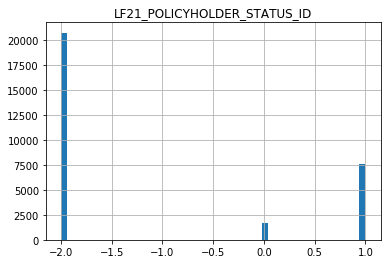

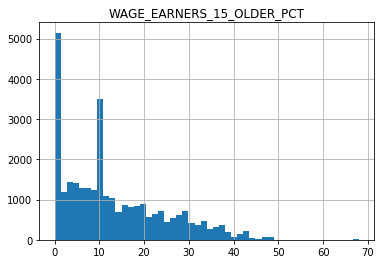

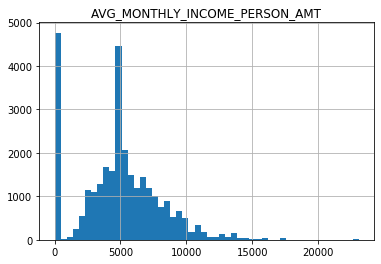

In [53]:
# import libraries needed to do EDA
import matplotlib.pyplot as plt
import seaborn as sns
# Lets look at the distribution plot of the features
for col in df.columns: 
    try:      
        df[col] = pd.to_numeric(df[col]) 
        df.hist(column=col, bins=50)
    except ValueError:
        print('This column can not be represented as a histogram')

In [ ]:
# del df['column_name']

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# the VIF value to understand the multi collinearity
selected_features = df.drop(columns=['AGE'])
target = df['AGE']

vif_data = pd.DataFrame()
vif_data["feature"] = selected_features.columns

vif_data["VIF"] = [variance_inflation_factor(selected_features.values, i)
                          for i in range(len(selected_features.columns))]
  
print(vif_data)

                         feature        VIF
0                 TEL_MOBILE_IND   1.169197
1        DAYS_TO_LAST_SITE_ENTRY   2.576048
2     LF1_POLICYHOLDER_STATUS_ID   1.982535
3    LF21_POLICYHOLDER_STATUS_ID   1.599774
4      WAGE_EARNERS_15_OLDER_PCT  15.352424
5  AVG_MONTHLY_INCOME_PERSON_AMT  19.163679


In [84]:
selected_features = df.drop(columns=['AGE','WAGE_EARNERS_15_OLDER_PCT']) #drop feature with high VIF and low corr to target
target = df['AGE']

vif_data = pd.DataFrame()
vif_data["feature"] = selected_features.columns

vif_data["VIF"] = [variance_inflation_factor(selected_features.values, i)
                          for i in range(len(selected_features.columns))]
  
print(vif_data)

                         feature       VIF
0                 TEL_MOBILE_IND  1.158705
1        DAYS_TO_LAST_SITE_ENTRY  2.503380
2     LF1_POLICYHOLDER_STATUS_ID  1.963628
3    LF21_POLICYHOLDER_STATUS_ID  1.586614
4  AVG_MONTHLY_INCOME_PERSON_AMT  2.247521


In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# create dataset
arrayT = target.values
arrayF = selected_features.values
X = arrayF
y = arrayT
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
for i in [X_train,X_test,y_train,y_test]:
    print("Shape of Data is {}".format(i.shape))
# prepare the cross-validation procedure
#kfold = KFold(n_splits=10, random_state=1, shuffle=True)
#lr = LinearRegression()
#scoring = 'neg_mean_squared_error'
#results = model_selection.cross_val_score(lr, X, y, cv=kfold, scoring=scoring)
#print("MAE: %.3f (%.3f)" % (results.mean(), results.std()))
#scoring = 'neg_mean_squared_error'
#results = model_selection.cross_val_score(lr, X, y, cv=kfold, scoring=scoring)
#print("MSE: %.3f (%.3f)" % (results.mean(), results.std()))
#scoring = 'r2'
#results = model_selection.cross_val_score(lr, X, y, cv=kfold, scoring=scoring)
#print("R^2: %.3f (%.3f)" % (results.mean(), results.std()))

Shape of Data is (21000, 5)
Shape of Data is (9000, 5)
Shape of Data is (21000,)
Shape of Data is (9000,)


In [86]:
# Lets train our model on training data and predict also on training to see results
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_train)
r2 = r2_score(y_train,y_pred)
rmse = np.sqrt(mean_squared_error(y_train,y_pred))
print('R-Squared Score is : {} | Root Mean Square Error is : {}'.format(r2,rmse))

R-Squared Score is : 0.27128427713987413 | Root Mean Square Error is : 15.984154246297747


Z-score Normalization

In [60]:
# Lets build our function which will perform the normaliztion
def rescale(X):
    mean = X.mean()
    std = X.std()
    scaled_X = [(i - mean)/std for i in X]
    return pd.Series(scaled_X)

In [61]:
# We will build a new dataframe
df_std = pd.DataFrame(columns=df.columns)
for i in df.columns:
    df_std[i] = rescale(df[i])

In [62]:
# Lets look at the descriptive stats now
df_std.describe().iloc[1:3:]

,AGE,TEL_MOBILE_IND,DAYS_TO_LAST_SITE_ENTRY,LF1_POLICYHOLDER_STATUS_ID,LF21_POLICYHOLDER_STATUS_ID,WAGE_EARNERS_15_OLDER_PCT,AVG_MONTHLY_INCOME_PERSON_AMT
mean,-8.032316e-16,2.643564e-14,5.596420e-15,-3.562717e-14,-2.952490e-14,-2.716739e-14,4.145077e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


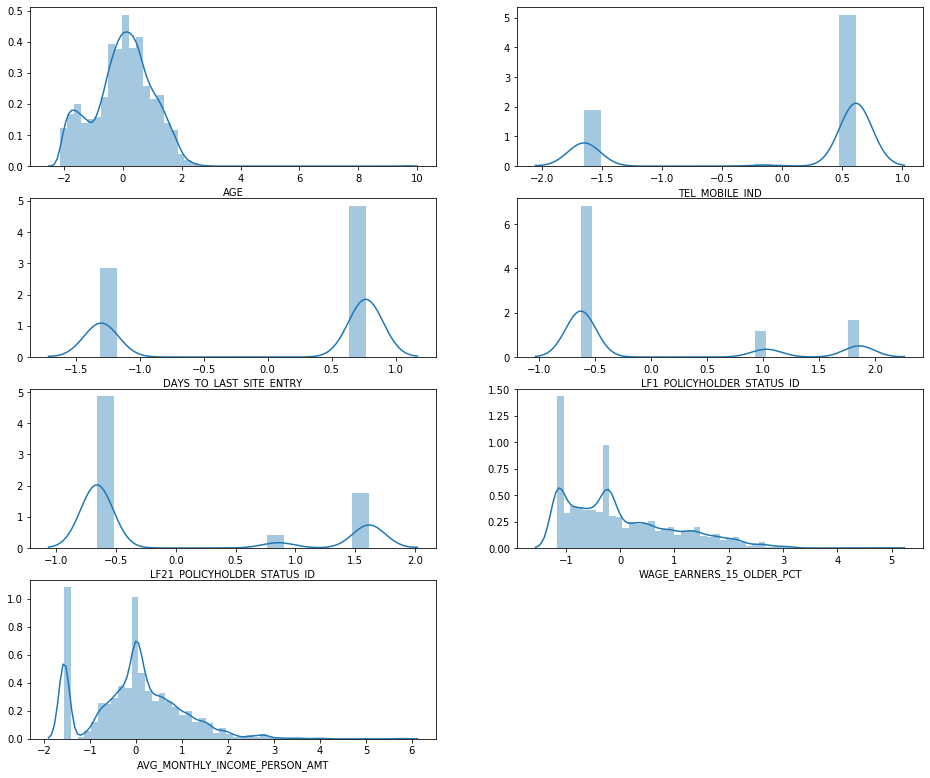

In [63]:
# lets look at the shape of data after scaling
pos = 1
fig = plt.figure(figsize=(16,24))
for i in df_std.columns:
    ax = fig.add_subplot(7,2,pos)
    pos = pos + 1
    sns.distplot(df_std[i],ax=ax)

In [69]:
# import libraries for PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
X = df_std.drop('AGE',axis=1)
X_pca = pca.fit_transform(X)
df_std_pca = pd.DataFrame(X_pca,columns=['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6'])
df_std_pca['AGE'] = df_std['AGE']

In [70]:
#Using Pearson Correlation
corr = df_std_pca.corr(method='pearson')
corr.style.background_gradient(cmap='coolwarm', axis=None)

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,AGE
PCA1,1,7.81835e-16,1.20525e-16,2.55832e-16,8.50309e-16,-1.14604e-16,0.124709
PCA2,7.81835e-16,1,1.84552e-15,-2.25016e-15,-4.18327e-15,-6.80451e-17,-0.414934
PCA3,1.20525e-16,1.84552e-15,1,1.35895e-15,5.17764e-17,-8.68904e-17,-0.235947
PCA4,2.55832e-16,-2.25016e-15,1.35895e-15,1,-1.37706e-15,6.6028e-18,0.122338
PCA5,8.50309e-16,-4.18327e-15,5.17764e-17,-1.37706e-15,1,-6.75999e-17,-0.0814228
PCA6,-1.14604e-16,-6.80451e-17,-8.68904e-17,6.6028e-18,-6.75999e-17,1,-0.0220951
AGE,0.124709,-0.414934,-0.235947,0.122338,-0.0814228,-0.0220951,1


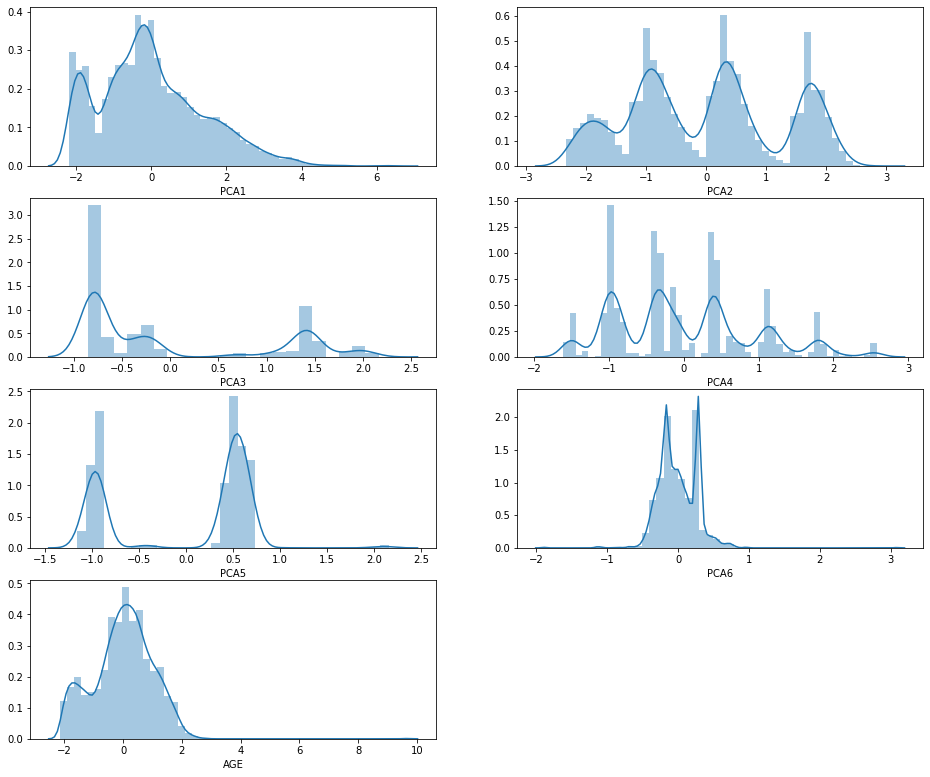

In [71]:
# Lets look at the distribution of our features after applying PCA
pos = 1
fig = plt.figure(figsize=(16,24))
for i in df_std_pca.columns:
    ax = fig.add_subplot(7,2,pos)
    pos = pos + 1
    sns.distplot(df_std_pca[i],ax=ax)

In [87]:
# Lets train our model on training data and predict also on training to see results
arrayT = df_std_pca['AGE'].values
arrayF = df_std_pca.drop(columns=['AGE']).values
X = arrayF
y = arrayT
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_train)
r2 = r2_score(y_train,y_pred)
rmse = np.sqrt(mean_squared_error(y_train,y_pred))
print('R-Squared Score is : {} | Root Mean Square Error is : {}'.format(r2,rmse))

R-Squared Score is : 0.26474633109620627 | Root Mean Square Error is : 0.860007815954299


In [55]:
# Lets train our model on training data and predict on testing to see results
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
r2 = r2_score(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print('R2 Score is : {} | Root Mean Square Error is : {}'.format(r2,rmse))